In [280]:
import numpy as np
import pandas as pd

In [281]:
df = pd.read_csv('./spam.csv',encoding = "ISO-8859-1")

In [282]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2629,ham,Hey there! Glad u r better now. I hear u treat...,NaN,NaN,NaN
3319,ham,Eh sorry leh... I din c ur msg. Not sad alread...,NaN,NaN,NaN
4088,ham,"How are you, my Love ? Are you with your broth...",NaN,NaN,NaN
1943,ham,I got lousy sleep. I kept waking up every 2 ho...,NaN,NaN,NaN
3938,ham,Y Ì_ wan to go there? C doctor?,NaN,NaN,NaN


In [283]:
df.shape

(5572, 5)

In [284]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement

## 1. Data Cleaning

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [286]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [287]:
df.sample(5)

,v1,v2
3346,ham,No problem baby. Is this is a good time to tal...
452,ham,K:)k:)what are detail you want to transfer?acc...
4812,ham,i can call in &lt;#&gt; min if thats ok
2918,ham,Is xy in ur car when u picking me up?
4221,ham,Yo you around? A friend of mine's lookin to pi...


In [288]:
# ranaming the cols
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [289]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [290]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [291]:
df['target'] = encoder.fit_transform(df['target'])

In [292]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [293]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [294]:
# check for duplicate values
df.duplicated().sum()

403

In [295]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [296]:
df.duplicated().sum()

0

In [297]:
df.shape

(5169, 2)

## 2. EDA

In [298]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

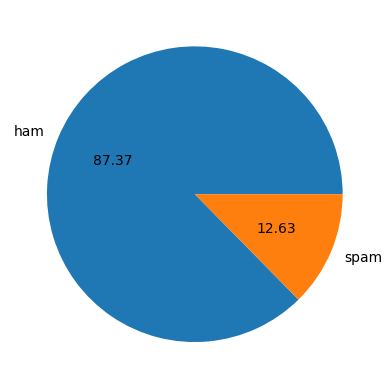

In [299]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [300]:
# Data is imbalanced

In [301]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [302]:
import nltk

In [303]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rahulgupta/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [304]:
df['num_characters'] = df['text'].apply(len) # number of characters in the text col for each row

In [305]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [306]:
# num of words
df['text'].apply(lambda txt: nltk.word_tokenize(txt))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [307]:
df['text'].apply(lambda txt: len(nltk.word_tokenize(txt)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [308]:
df['num_words'] = df['text'].apply(lambda txt: len(nltk.word_tokenize(txt)))

In [309]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [310]:
df['text'].apply(lambda txt: nltk.sent_tokenize(txt))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [311]:
df['text'].apply(lambda txt: len(nltk.sent_tokenize(txt)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: text, Length: 5169, dtype: int64

In [312]:
df['num_sentences'] = df['text'].apply(lambda txt: len(nltk.sent_tokenize(txt)))

In [313]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [314]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [315]:
# ham
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [316]:
# spam
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [317]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [318]:
# histograms
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

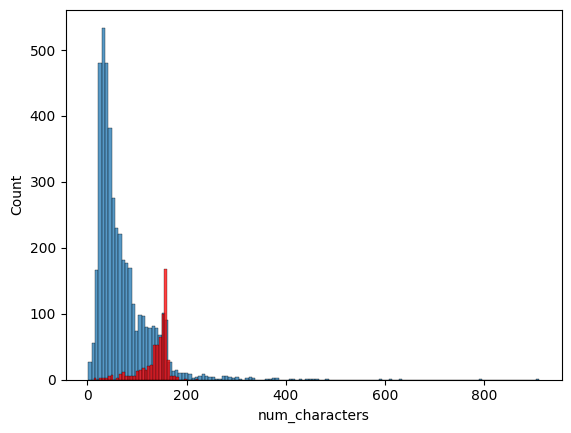

In [319]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

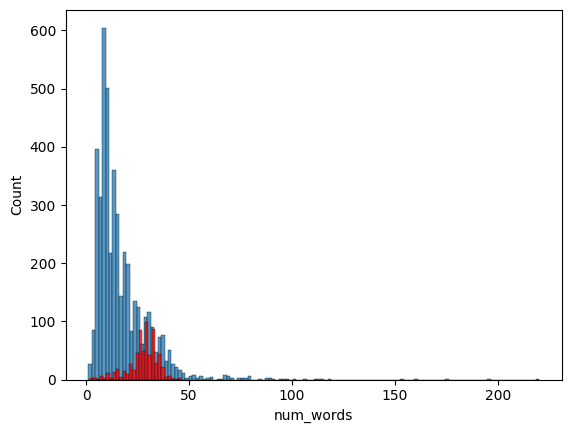

In [320]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

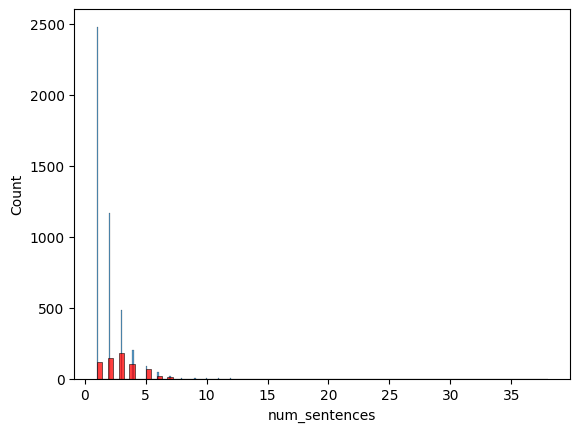

In [321]:
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'], color='red')

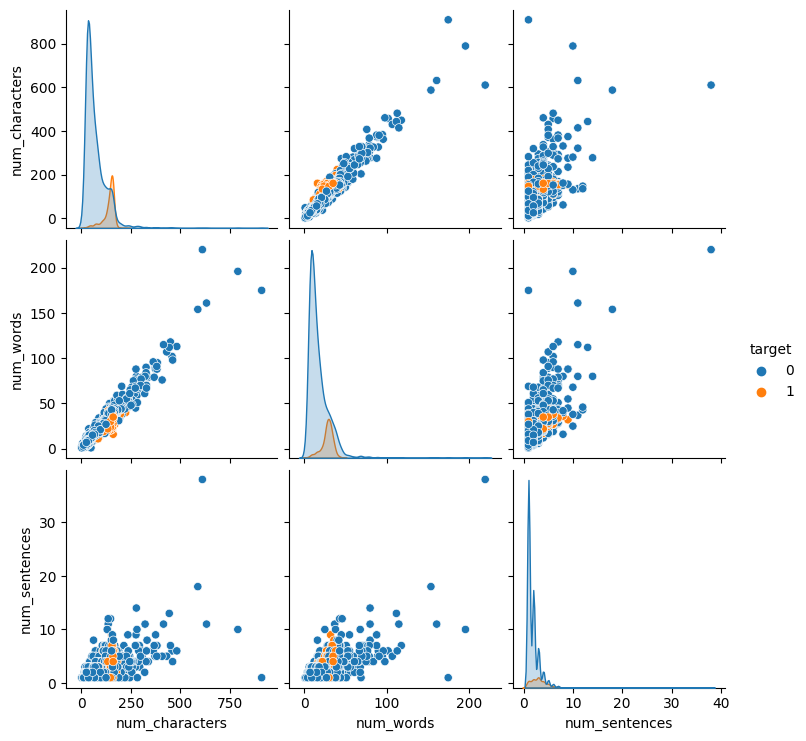

In [322]:
sns.pairplot(df, hue='target')

In [323]:
except_text = df.drop(columns='text')
except_text.head()

,target,num_characters,num_words,num_sentences
0,0,111,24,2
1,0,29,8,2
2,1,155,37,2
3,0,49,13,1
4,0,61,15,1


In [324]:
except_text.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

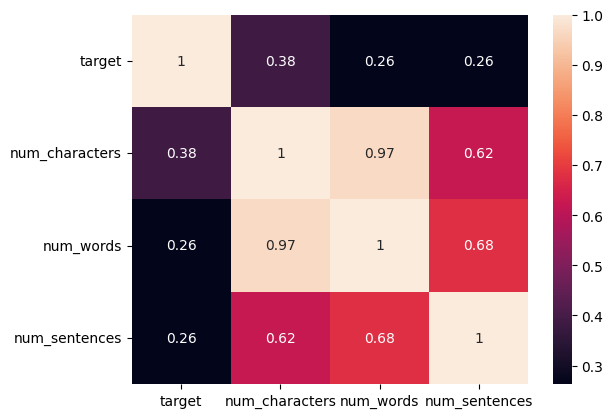

In [325]:
sns.heatmap(except_text.corr(), annot=True)

In [326]:
# Observations
# num_characters have the highest correlation with target ie. 0.38
# so we will keep num_characters and drop num_words and num_sentences

## 3. Data Preprocessing

- Lower case
- Tokenization
- Removing special characters
- Remove stop words and punctuation
- Stemming

In [327]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rahulgupta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [328]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [329]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [330]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
print(ps.stem('dancing'))
print(ps.stem('loving'))

danc
love


In [331]:


def transform_text(text: str):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    text = y[:]
    return text

In [332]:
text = 'Hi how Are you? my friend Rahul You got a 20% raise'
print(text)
transform_text(text)

Hi how Are you? my friend Rahul You got a 20% raise


['hi', 'friend', 'rahul', 'got', '20', 'rais']

In [333]:
transform_text('Did you like my presentation on ML?')

['like', 'present', 'ml']

In [334]:
transform_text('I loved the YT lectures on Machine Learning. How about you?')

['love', 'yt', 'lectur', 'machin', 'learn']

In [335]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [336]:
transform_text(df['text'][0])

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat']

In [337]:
df['transformed_text'] = df['text'].apply(transform_text)

In [338]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]"


In [339]:
df['transformed_text'].describe()

count     5169
unique    5094
top         []
freq         9
Name: transformed_text, dtype: object

In [340]:

spam_concatenated_text = " ".join(np.concatenate(df[df['target'] == 1]['transformed_text'].values))


In [341]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [342]:
# word cloud
from wordcloud import WordCloud

wc = WordCloud(width=500,height=500,background_color='white')


In [343]:
test_wc = wc.generate("Your text goes here wooho we changed the world")

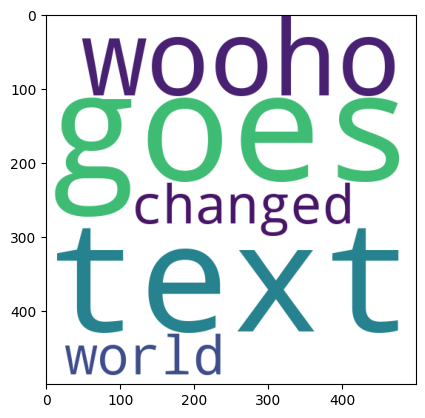

In [344]:
plt.imshow(test_wc)

In [345]:
spam_wc = wc.generate(spam_concatenated_text)

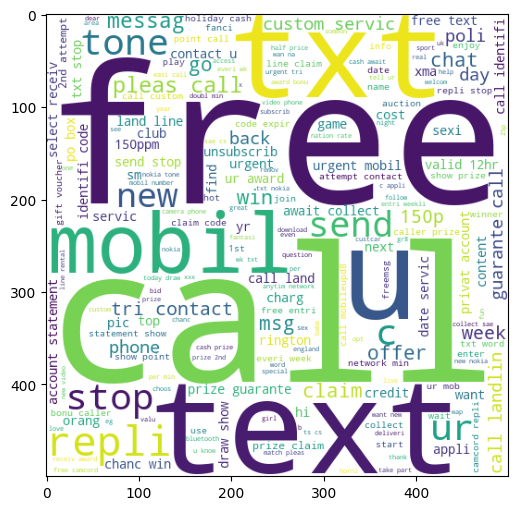

In [346]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

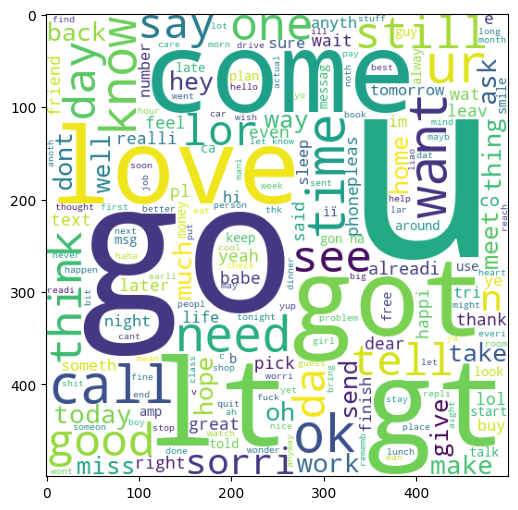

In [347]:
ham_concatenated_text = " ".join(np.concatenate(df[df['target'] == 0]['transformed_text'].values))
ham_wc = wc.generate(ham_concatenated_text)
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [348]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg:
        spam_corpus.append(word)

In [349]:
len(spam_corpus)

9939

In [350]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [351]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


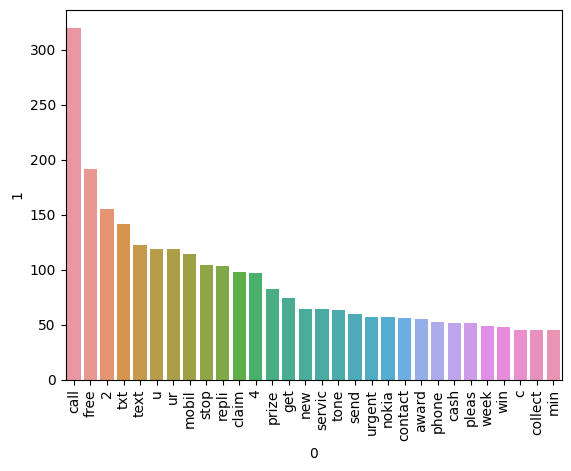

In [352]:
f = pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x=f[0], y=f[1])
plt.xticks(rotation="vertical")
plt.show()

In [353]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg:
        ham_corpus.append(word)

In [354]:
len(ham_corpus)

35404

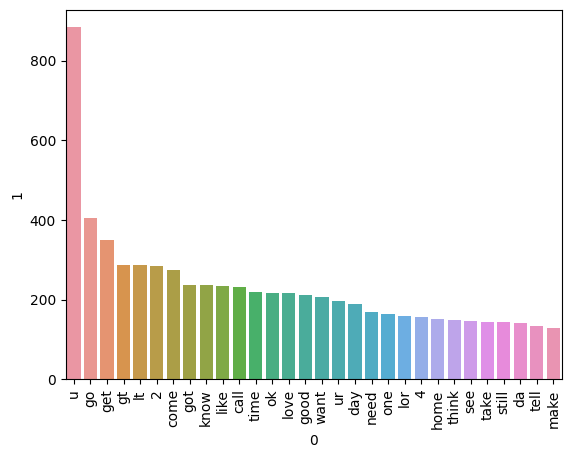

In [355]:
f = pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x=f[0], y=f[1])
plt.xticks(rotation="vertical")
plt.show()

## 4. Model Building

In [356]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]"


In [357]:
# Text Vectorization
# using Bag of Words


In [358]:
df['transformed_text'] = df['transformed_text'].apply(lambda x : " ".join(x))

In [359]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [360]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [361]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [362]:
X.shape

(5169, 6708)

In [363]:
y = df['target'].values

In [364]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [365]:
from sklearn.model_selection import train_test_split

In [366]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [367]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [368]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [369]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [370]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [371]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [372]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [373]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [374]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [375]:
X.shape

(5169, 3000)

In [376]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [377]:
def try_algo(algo):
    algo.fit(X_train, y_train)
    y_pred = algo.predict(X_test)
    print(accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(precision_score(y_test, y_pred))

In [378]:
try_algo(gnb)

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [379]:
try_algo(mnb)

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [380]:
try_algo(bnb)

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


tfidf ->> mnb

is the best

because, when building spam classifier, we don't want False Positives

email being not spam but declared as spam by the system

### Trying other algorithms

In [381]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [382]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [383]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [384]:
clfs = {
    'SVC': svc,
    "KN": knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [385]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [386]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9758220502901354, 0.9747899159663865)

In [387]:
accuracy_scores = []
precision_scores = []
for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print('For ', name)
    print('Accuracy - ', current_accuracy)
    print('Precision - ', current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9313346228239845
Precision -  0.8252427184466019
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9333333333333333


In [388]:
performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
})

In [389]:
performance_df.sort_values('Accuracy',  inplace=True, ascending=False)

In [390]:
performance_df.sort_values('Precision',  inplace=True, ascending=False)

In [391]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.970986,1.000000
1,KN,0.905222,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.933333
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


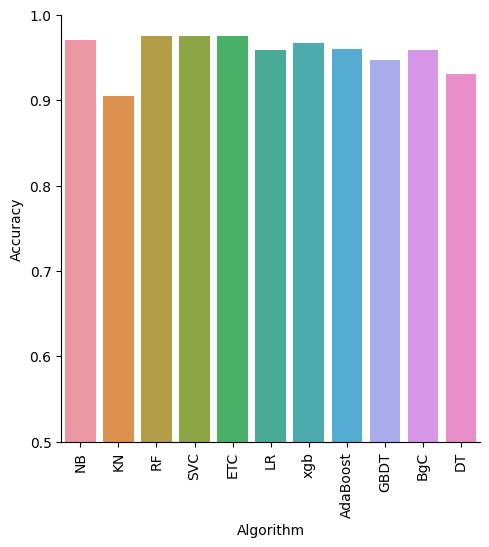

In [392]:
sns.catplot(x="Algorithm", y="Accuracy", data=performance_df, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

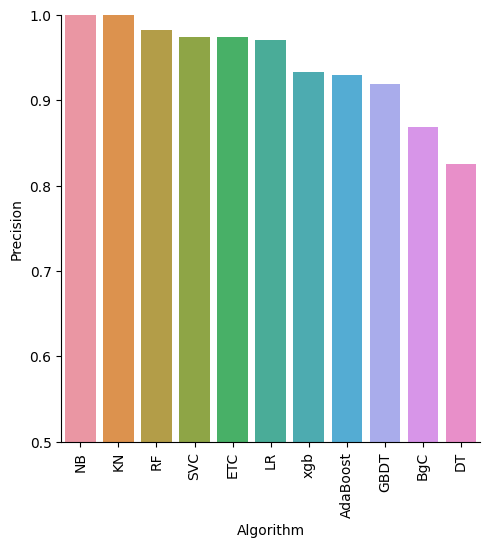

In [393]:
sns.catplot(x="Algorithm", y="Precision", data=performance_df, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

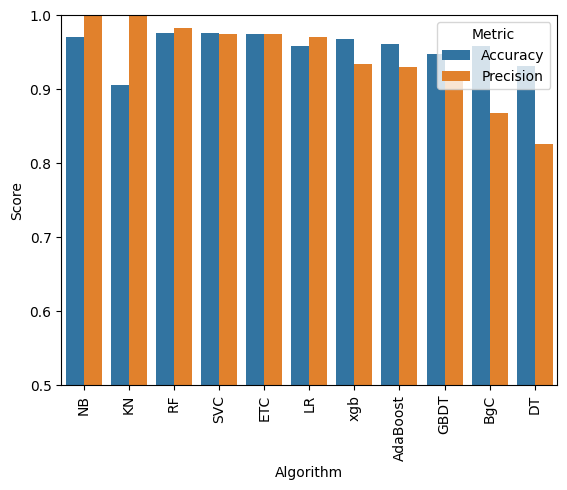

In [394]:
# Combine the 'Accuracy' and 'Precision' columns into a single DataFrame for plotting
combined_df = pd.concat([performance_df['Algorithm'], performance_df['Accuracy'], performance_df['Precision']], axis=1)

# Melt the DataFrame to convert 'Accuracy' and 'Precision' columns into a single 'Metric' column
melted_df = combined_df.melt(id_vars='Algorithm', var_name='Metric', value_name='Score')

# Plot the combined bar graph
sns.barplot(x='Algorithm', y='Score', hue='Metric', data=melted_df)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

In [395]:
# model improvement
# 1. Change the max_features parameter of TfIdf
# 2. try Voting Classifier
# 3. try Stacking Classifier

In [396]:
# Voting Classifier
# trying combined models

In [397]:
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [398]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting='soft')

In [399]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [400]:
y_pred = voting.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [401]:
# Applying stacking
# trying combined models with different weights

In [402]:
estimators = [('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator = RandomForestClassifier()

In [403]:
from sklearn.ensemble import StackingClassifier

In [404]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [405]:
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# print("Accuracy", accuracy_score(y_test, y_pred))
# print("Precision", precision_score(y_test, y_pred))

In [406]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))
